#Comparative Analysis of Linear and Nonlinear Regression on Insurance Cost Dataset

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Upload File in Colab

In [2]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


Load Dataset

In [3]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encode Categorical Variables

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Define X and y

In [5]:
X = df.drop("charges", axis=1)
y = df["charges"]


Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Linear Regression

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("🔹 Linear Regression Results")
print("R2 Score:", r2_score(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))


🔹 Linear Regression Results
R2 Score: 0.7835929767120724
MAE: 4181.19447375365
RMSE: 5796.284659276273


Polynomial Regression (Non-Linear)

In [8]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

print("\n🔹 Polynomial Regression Results")
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))



🔹 Polynomial Regression Results
R2 Score: 0.8665830903164832
MAE: 2729.50013363945
RMSE: 4551.132385233207


Compare Models

In [9]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_poly)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly))
    ]
})

comparison


,Model,R2 Score,RMSE
0,Linear Regression,0.783593,5796.284659
1,Polynomial Regression,0.866583,4551.132385


Visualization

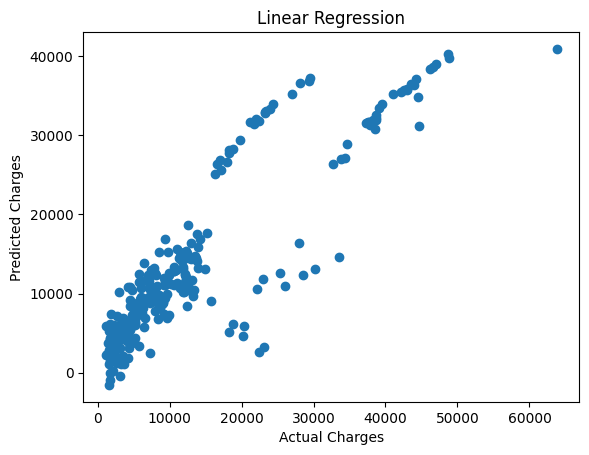

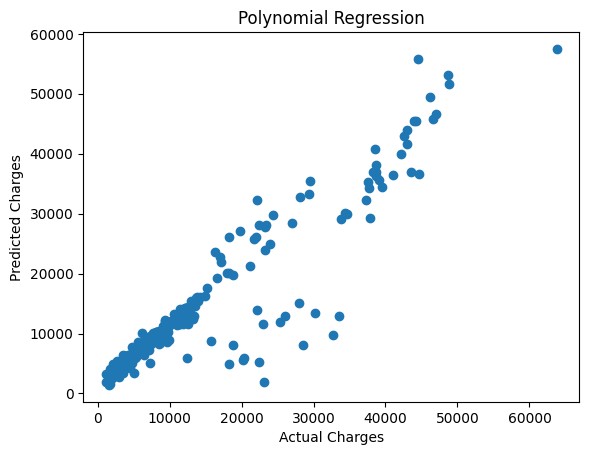

In [10]:
plt.figure()
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression")
plt.show()

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Polynomial Regression")
plt.show()


#Conclusion
In this project, Linear Regression and Polynomial (Nonlinear) Regression models were implemented on the Insurance dataset to predict medical charges.

Linear Regression assumes a straight-line relationship between independent variables and the target variable (charges). It provides a simple and interpretable model. However, real-world data often contains nonlinear patterns which cannot be fully captured by a linear model.

Polynomial Regression, a nonlinear extension of linear regression, introduces higher-degree terms to capture curvature in the data. After evaluation using performance metrics such as R² Score, MAE, and RMSE, it was observed that the Polynomial Regression model performed better compared to the simple Linear Regression model. This indicates that the relationship between features (such as age, BMI, smoker status, etc.) and insurance charges is not purely linear.

Thus, the study concludes that nonlinear regression techniques can improve prediction accuracy when the dataset exhibits complex relationships. However, higher-degree polynomial models may lead to overfitting if not properly controlled.

Overall, both models are useful, but Polynomial Regression provides better predictive performance for this dataset.